# Lesson 03: Transience and knickpoints

*This lesson has been written by Simon M. Mudd at the University of Edinburgh*

*Last update 04/09/2020*

Okay, if you have followed through the first two lessons, you will be getting a feel for the shape of channel longitudinal profiles. In this lesson, we will look at landscape transience, using simulations based on the stream power model (see previous lesson for warning labels on this approach). 

We are going to use the `channeltoy` python package, which I wrote for very simple simulations of channel profiles. First, we need to install and import some pacakges for running `channeltoy` and plotting the results. 

In [1]:
!pip install channeltoy

In [2]:
import channeltoy as ct
import matplotlib.pyplot as plt
import numpy as np

Now create a channel and set it to steady state, increase the uplift rate, and run the simulation:

K is: 5e-05
U is: 0.0002
U is: 0.0005

Saving this timestep: 0.0
Time is: 20000.0 
Saving this timestep: 25000.0
Time is: 45000.0 
Saving this timestep: 50000.0
Time is: 50000.0 

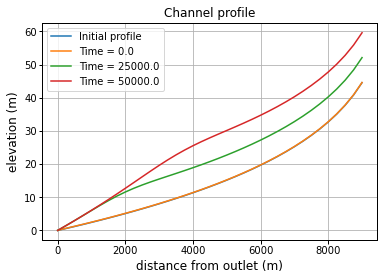

In [3]:
# create a channel
chan = ct.channeltoy(spacing=250, U = 0.0002, K = 0.00005, n=1, m= 0.45)
initial_elevation = chan.solve_steady_state_elevation()

# change the uplift rate
chan.set_U_values(U = 0.0005)

# Run the transient simulation. You can use the start and end time to 
times, elevations = chan.transient_simulation(base_level = 0, dt = 200, 
                                              start_time = 0, end_time = 50001, 
                                              print_interval = 25000)

# Make a plot of the elevations
chan.plot_transient_channel(times = times, 
                            elevations = elevations, 
                            initial_elevation = initial_elevation,
                            show_figure=True,print_to_file=False)

The channel has retained the elevations from the last timestep, so you can actually keep it running for another few steps if you want.


Saving this timestep: 50000.0
Time is: 70000.0 
Saving this timestep: 75000.0
Time is: 95000.0 
Saving this timestep: 100000.0
Time is: 100000.0 

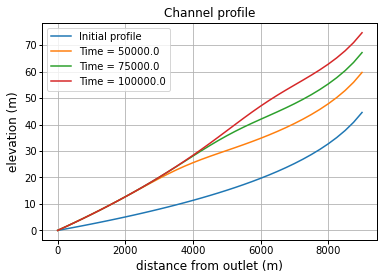

In [4]:
# Continue running the model. 
times, elevations = chan.transient_simulation(base_level = 0, dt = 200, 
                                              start_time = 50000, end_time = 100001, 
                                              print_interval = 25000)
chan.plot_transient_channel(times = times, 
                            elevations = elevations, 
                            initial_elevation = initial_elevation,
                            show_figure=True,print_to_file=False)

## Knickpoints

In lesson 1, we looked at how rivers are typically concave (or if you are being mathematically correct, concave up). In lesson 2 we showed how the stream power law also predicts a concave river profile if uplift is steady. In the above simulation, not all of the channel is concave.

What is happening in this simulation? Lets do another simulation with a larger change in the uplift rate and more timesteps:

K is: 5e-05
U is: 0.0001
U is: 0.0005

Saving this timestep: 0.0
Time is: 5000.0 
Saving this timestep: 10000.0
Time is: 15000.0 
Saving this timestep: 20000.0
Time is: 25000.0 
Saving this timestep: 30000.0
Time is: 35000.0 
Saving this timestep: 40000.0
Time is: 45000.0 
Saving this timestep: 50000.0
Time is: 55000.0 
Saving this timestep: 60000.0
Time is: 65000.0 
Saving this timestep: 70000.0
Time is: 70000.0 

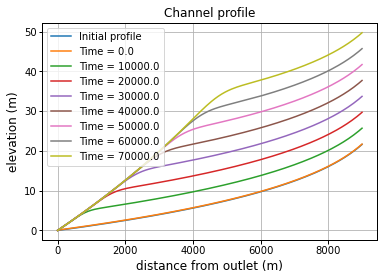

In [5]:
# create a channel
chan = ct.channeltoy(spacing=50, U = 0.0001, K = 0.00005, n=1, m= 0.45)
initial_elevation = chan.solve_steady_state_elevation()

# change the uplift rate
chan.set_U_values(U = 0.0005)

# Run the transient simulation. You can use the start and end time to 
times, elevations = chan.transient_simulation(base_level = 0, dt = 200, 
                                              start_time = 0, end_time = 70001, 
                                              print_interval = 10000)

# Make a plot of the elevations
chan.plot_transient_channel(times = times, 
                            elevations = elevations, 
                            initial_elevation = initial_elevation,
                            show_figure=True,print_to_file=False)

What is happening here? You start from a steady channel and increase uplift, and a steeper section then "grows" upstream. This new section has a channel steepness that reflects the new erosion rate (which reflects the new uplift rate). I will show you this in a slope-area plot:

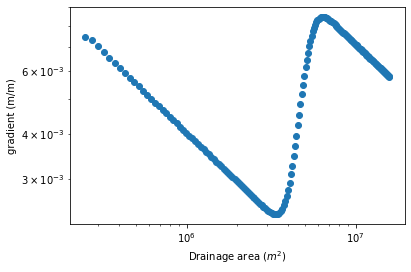

In [6]:
A = chan.A_data
z = chan.z_data
S = np.gradient(z)/50     # The 50 is the spacing of the nodes I used above

plt.scatter(A,S)
plt.xlabel("Drainage area ($m^2$)")
plt.ylabel("gradient (m/m)")
plt.yscale('log')
plt.xscale('log')

**Important note here**: I use a very basic solution of the equations that "smears" the boundary between the different erosion rates. If you use an exact solution, the boundary is perfectly sharp: a step change. You can read all about that in this paper:
            
Royden, L., Perron, J.T., 2013. Solutions of the stream power equation and application to the evolution of river longitudinal profiles. Journal of Geophysical Research: Earth Surface 118, 497–518. https://doi.org/10.1002/jgrf.20031

The change in steepness corresponds to a part of the channel that is **convex**. A convexity in a channel profile is an indicator of a **knickpoint**. A knickpoint can be a step change in the channel elevation (a waterfall, basically) or it can be a zone of increased steepness, sometimes called a **knickzone**. In the simulation above, the knickzone actually extends all the way from the outlet to the convexity in the channel profile.

## Some knickzones move upstream

Knickzone occur for a number of reasons, for example due to changes in rock hardness. If they are fixed somewhere at a lithological boundary, we call these stationary knickpoints or knickzones. But knickpoints and knickzones generated by changes in erosion rates will migrate upstream. 

You can actually change the uplift rate midway through a run in the `channeltoy` to see how knickzones move through the system:

K is: 5e-05
U is: 0.0002
U is: 0.0005

Saving this timestep: 0.0
Time is: 20000.0 
Saving this timestep: 25000.0
Time is: 45000.0 
Saving this timestep: 50000.0
Time is: 50000.0 U is: 0.0001

Saving this timestep: 50000.0
Time is: 70000.0 
Saving this timestep: 75000.0
Time is: 95000.0 
Saving this timestep: 100000.0
Time is: 100000.0 

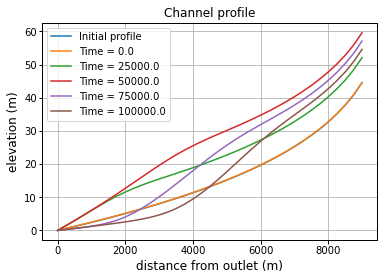

In [7]:
# create a channel
chan = ct.channeltoy(spacing=250, U = 0.0002, K = 0.00005, n=1, m= 0.45)
initial_elevation = chan.solve_steady_state_elevation()

# change the uplift rate
chan.set_U_values(U = 0.0005)

# Run the transient simulation. You can use the start and end time to 
times, elevations = chan.transient_simulation(base_level = 0, dt = 200, 
                                              start_time = 0, end_time = 50001, 
                                              print_interval = 25000)

# Now change the uplift rate
chan.set_U_values(U = 0.0001)

# Run the transient simulation. You can use the start and end time to 
times2, elevations2 = chan.transient_simulation(base_level = 0, dt = 200, 
                                              start_time = 50000, end_time = 100001, 
                                              print_interval = 25000)
# We need to get rid of the first time and elevation. This explanation is tedious.
times2.pop(0)
elevations2.pop(0)

# Now concatenate the time series
all_times = np.concatenate((times, times2))
all_elevs = np.concatenate((elevations, elevations2), axis=0)

# Make a plot of the elevations
chan.plot_transient_channel(times = all_times, 
                            elevations = all_elevs, 
                            initial_elevation = initial_elevation,
                            show_figure=True,print_to_file=False)

Geomorphologists spend a lot of time looking for either knickzones or changes to channel steepness. They could indicate a change to the rock hardness, but you can often rule that out using geological maps. 

In fact, the migration of knickzones upstream does not depend on the stream power law (which has many critics): any number of physically based incision models have this behaviour (but the details differ: different models predict different rates of knickzone migration).

__Task:__ Play around with the parameters above to get a feeling for how quickly knickzones migrate through a channel in response to changing uplfit rates.  